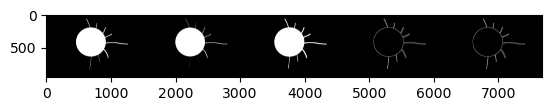

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
img=cv2.imread("../resource/corrosion.jpg")
kn1=np.ones((4,4),np.uint8)
img_gradient=cv2.morphologyEx(img,cv2.MORPH_GRADIENT,kn1)
img_erode=cv2.erode(img,kn1,iterations=1)
img_dilate=cv2.dilate(img,kn1,iterations=1)
img_handmade=img_dilate-img_erode
ret=np.hstack((img,img_erode,img_dilate,img_gradient,img_handmade))
plt.imshow(ret)